# Importing libraries

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
import calendar
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

# 1. Data Preparation

<b> 1.1 Write a python program to merge data from each month into one CSV and read in updated dataframe.

In [2]:
# giving Sales files location
dirPath = '../Sales Files/'
# looping in dirPath
for files in os.listdir(dirPath):
    print(files) # printing all files in dirPath

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
# creating an empty DataFrame
totalYearSales = pd.DataFrame()
# looping in dirPath
for files in os.listdir(dirPath):
    if files.endswith('.csv'):
        # building the full path to the files
        filepath = os.path.join(dirPath, files) 
        # reading the all files into DataFrame
        df = pd.read_csv(filepath)   
        # concatenating the data from the CSV file to the totalYearSales DataFrame
        totalYearSales = pd.concat([totalYearSales, df])
# converting DataFrame to csv file
totalYearSales.to_csv('totalYearSales.csv', index=0)

In [4]:
# displaying data of totalYearSales dataframetotalYearSales
totalYearSales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


<b> 1.2 Write a python program to remove the NaN missing values from updated dataframe. 

In [5]:
# displaying all null values in every columns
totalYearSales.isnull().sum()

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

In [6]:
# displaying if rows have null values
totalYearSales.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
11681,False,False,False,False,False,False
11682,False,False,False,False,False,False
11683,False,False,False,False,False,False
11684,False,False,False,False,False,False


In [7]:
# dropping every null values adn displaying them 
totalYearSales = totalYearSales.dropna(how='all')
totalYearSales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
# displaying if rows have null values
totalYearSales.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
...,...,...,...,...,...,...
11681,False,False,False,False,False,False
11682,False,False,False,False,False,False
11683,False,False,False,False,False,False
11684,False,False,False,False,False,False


<b> 1.3 Write a python program to convert Quantity Ordered and Price Each to numeric. 

In [9]:
# displaying all columns data type
totalYearSales.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [10]:
# converting data type of Quantity Ordered and Price Each to int
totalYearSales['Quantity Ordered'] = totalYearSales['Quantity Ordered'].astype(int)
totalYearSales['Price Each'] = totalYearSales['Price Each'].astype(int)
totalYearSales.dtypes

Order ID            float64
Product              object
Quantity Ordered      int32
Price Each            int32
Order Date           object
Purchase Address     object
dtype: object

<b> 1.4 Create a new column named Month from Ordered Date of updated dataframe and convert it to integer as data type.

In [11]:
# Creating a new column Month and storing only month from Order Date column in it
totalYearSales['Month'] = totalYearSales['Order Date'].str.split('/').str[0].astype(int)
totalYearSales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2,11,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1,99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1,11,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1,11,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


<b> 1.5 Create a new column named City from Purchase Address based on the value in updated dataframe.

In [12]:
# Creating a new column City and storing only city names from Purchase Address column in it
totalYearSales['City'] = totalYearSales['Purchase Address'].str.split(',').str[1]
totalYearSales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2,11,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559.0,Bose SoundSport Headphones,1,99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560.0,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560.0,Wired Headphones,1,11,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561.0,Wired Headphones,1,11,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


# 2. Data Analysis

<b> 2.1  Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable. 

In [13]:
# choosing a variable to analyze
var = 'Price Each'
# Calculating sum
totalValue = totalYearSales[var].sum()
# displaying sum of Price Each'
print(f'The sum of {var} is {totalValue:.2f}')

The sum of Price Each is 34150278.00


In [14]:
# Calculating mean
meanValue = totalYearSales[var].mean()
# displaying mean of Price Each'
print(f'The mean of {var} is {meanValue:.2f}')

The mean of Price Each is 183.65


In [15]:
# Calculating standard deviation
stdValue = totalYearSales[var].std()
# displaying standard deviation of Price Each'
print(f'The standard deviation of {var} is {stdValue:.2f}')

The standard deviation of Price Each is 332.94


In [16]:
# Calculating skewness
skewValue = totalYearSales[var].skew()
# displaying skewness of Price Each'
print(f'The skewness of {var} is {skewValue:.2f}')

The skewness of Price Each is 2.87


In [17]:
# Calculating kurtosis
kurtosisValue = totalYearSales[var].kurtosis()
# displaying kurtosis of Price Each'
print(f'The kurtosis of {var} is {kurtosisValue:.2f}')

The kurtosis of Price Each is 9.09


<b> 2.2  Write a Python program to calculate and show correlation of all variables. 

In [18]:
totalYearSales.dtypes

Order ID            float64
Product              object
Quantity Ordered      int32
Price Each            int32
Order Date           object
Purchase Address     object
Month                 int32
City                 object
dtype: object

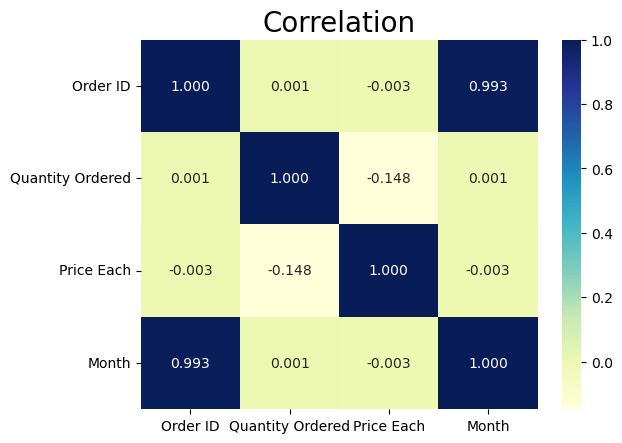

In [19]:
# Calculating correlation of totalYearSales DataFrame and assigning it to corr
corr = totalYearSales.corr()
# ploting the correlation matrix as a heatmap
sns.heatmap(data=corr, cmap="YlGnBu", annot=True, fmt=".3f")
plt.title("Correlation", fontsize = 20)
# displaying the plot
plt.show()

# 3. Data Exploration

<b> 3.1 Which Month has the best sales? and how much was the earning in that month? Make a bar graph of sales as well.

In [20]:
# multiplying Quantity Ordered and Price Each and assiging it to Sales
totalYearSales['Sales'] = totalYearSales['Quantity Ordered'] * totalYearSales['Price Each']
# calculating the sum of sales for each month using the groupby() function and the sum() function
Sales = totalYearSales.groupby('Month')['Sales'].sum()
# displaying the total sales of each month
print(Sales)

Month
1     1813956
2     2191696
3     2794068
4     3374951
5     3138287
6     2566187
7     2635443
8     2234194
9     2087435
10    3719205
11    3184394
12    4591824
Name: Sales, dtype: int32


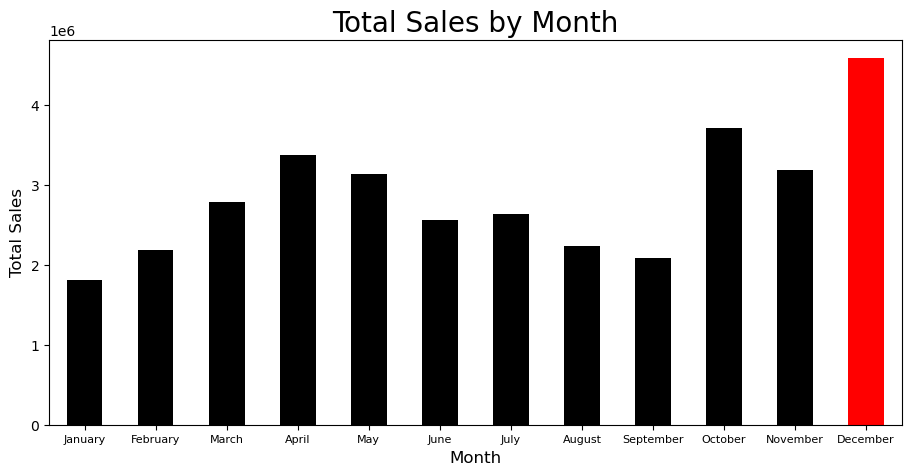

In [21]:
fig = plt.figure(figsize=(11,5)) # creating new figure of (11,5) size
bestSalesMonth = Sales.idxmax() # finding the month with highest sales
colors = ['black'] * len(Sales) # setting bar color to black 
colors[Sales.index.get_loc(bestSalesMonth)] = 'red' # setting color of month with highest sell to red 
monthNames = [calendar.month_name[month] for month in Sales.index] # creating list of month names
Sales.plot(kind='bar', color=colors) # creating a bar graph
plt.xticks(range(len(monthNames)), monthNames, rotation=0, fontsize=8) # setting the x-axis tick labels to the month
plt.xlabel('Month', fontsize=12) # setting the x-axis label to Month
plt.ylabel('Total Sales', fontsize=12) # setting the y-axis label to Total Sales
plt.title('Total Sales by Month', fontsize=20) # setting the title of the chart to Total Sales by Month
plt.show() # displaying the graph

<b> 3.2 Which city has sold the highest product?

In [22]:
# calculating city with their purchase
citySales = totalYearSales.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)
# displaying city with sales
print(citySales)

City
 San Francisco    50239
 Los Angeles      33289
 New York City    27932
 Boston           22528
 Dallas           16730
 Atlanta          16602
 Seattle          16553
 Portland         14053
 Austin           11153
Name: Quantity Ordered, dtype: int32


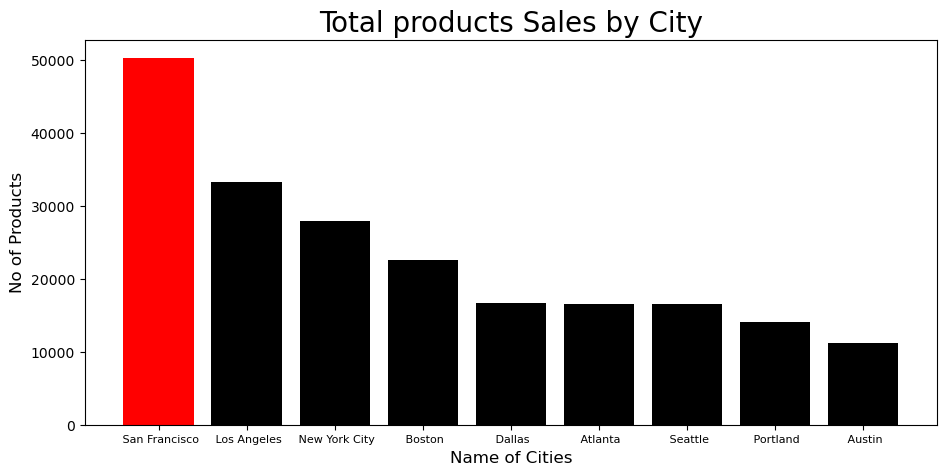

In [23]:
fig = plt.figure(figsize=(11,5)) # creating new figure of (11,5) size
bestSalesCity = citySales.idxmax() # finding the city with highest product sold
colors = ['black'] * len(citySales) # setting bar color to black 
colors[citySales.index.get_loc(bestSalesCity)] = 'red'# setting color of city with highest product sold to red
plt.bar(list(citySales.keys()),list(citySales),color=colors) # plotting cities and products
plt.xticks(rotation=0, fontsize=8) # setting rotation and fontsize of cities
plt.title("Total products Sales by City", fontsize=20) # setting the title of the chart to Total products sales by City
plt.ylabel("No of Products", fontsize=12) # setting the y-axis label to No of Products
plt.xlabel("Name of Cities", fontsize=12) # setting the y-axis label to Name of Cities
plt.show() # displaying the graph 

<b> 3.3 Which product was sold the most in overall? Illustrate it through bar graph.

In [24]:
# calculating products sales
productSales = totalYearSales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
# displaying products and their total sales
print(productSales)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32


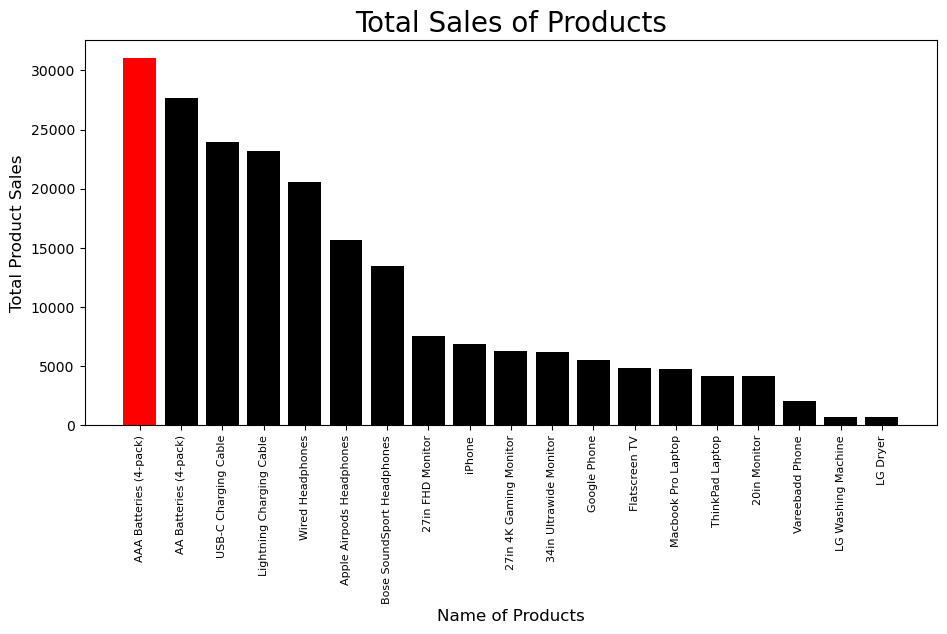

In [25]:
fig = plt.figure(figsize=(11,5)) # creating new figure of (11,5) size
bestSalesProduct = productSales.idxmax() # finding the product which has most sold
colors = ['black'] * len(productSales) # setting bar color to black 
colors[productSales.index.get_loc(bestSalesProduct)] = 'red' # setting color of the product which has most sold to red
plt.bar(list(productSales.keys()),list(productSales),color=colors) # plotting products and their sales
plt.xticks(rotation=90, fontsize=8) # setting rotation and fontsize of name of products
plt.title("Total Sales of Products", fontsize=20) # setting the title of the chart to Total Sales of Products
plt.ylabel("Total Product Sales", fontsize=12) # setting the y-axis label to Total Product Sales
plt.xlabel("Name of Products", fontsize=12) # setting the x-axis label to Name of Products
plt.show() # displaying the graph 

<b> 3.4  Write a Python program to show histogram plot of any chosen variables. Use proper labels in the graph.

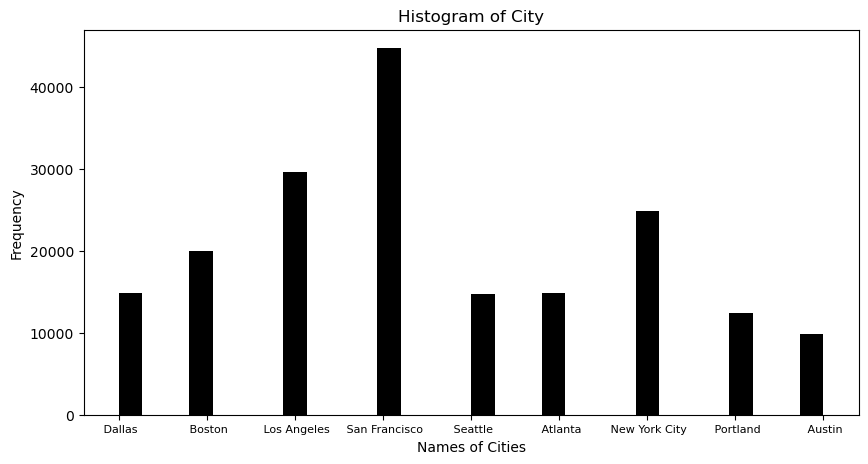

In [26]:
data = totalYearSales['City'] # selecting the 'City' column from the 'totalYearSales' and assigning it to data
fig, cities = plt.subplots(figsize=(10, 5)) # creating a figure with (10,5) size
cities.hist(data, bins=30, color='black') # creating a histogram with 30 bins using the 'data' series
plt.xticks(fontsize=8) # setting font size of names of cities to 8
cities.set_title("Histogram of City") # setting the title of the chart to Histogram of City
cities.set_xlabel("Names of Cities") # setting the x-axis label to Name of cities
cities.set_ylabel("Frequency") # setting the y-axis label to frequency
plt.show() # displaying the graph